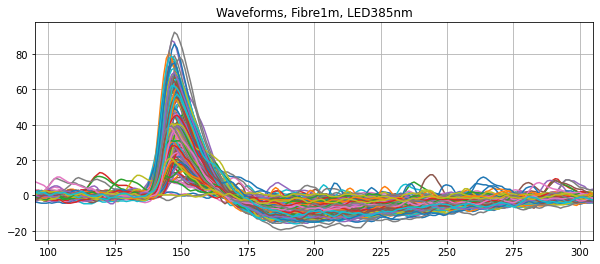

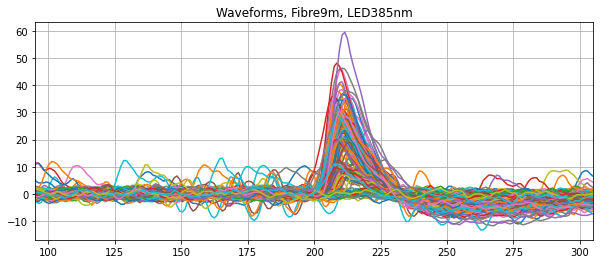

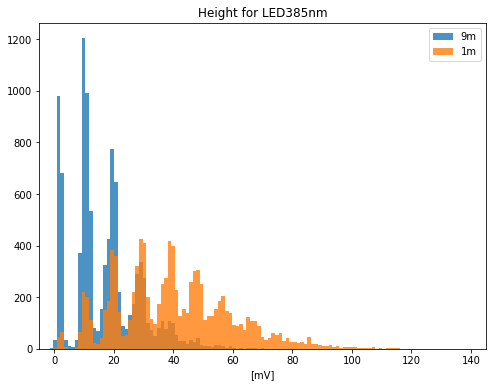

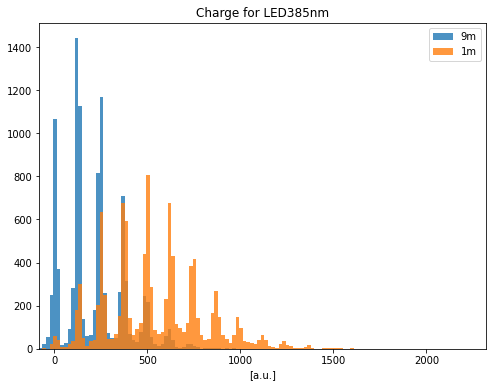

0.39192320781412016


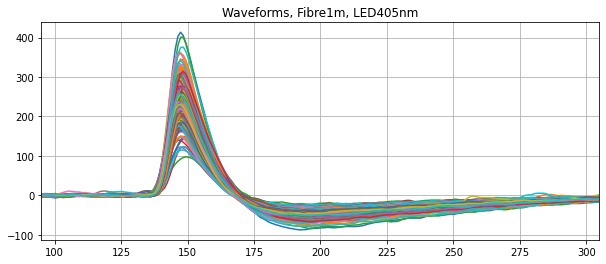

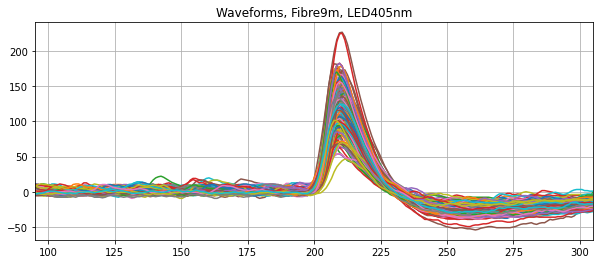

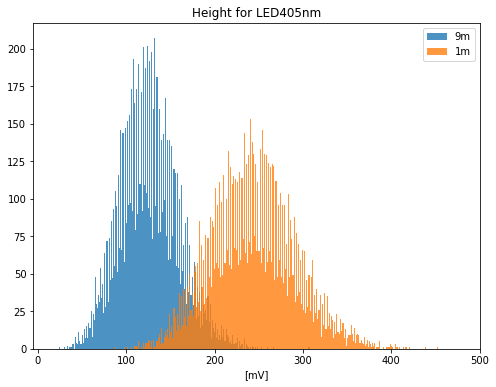

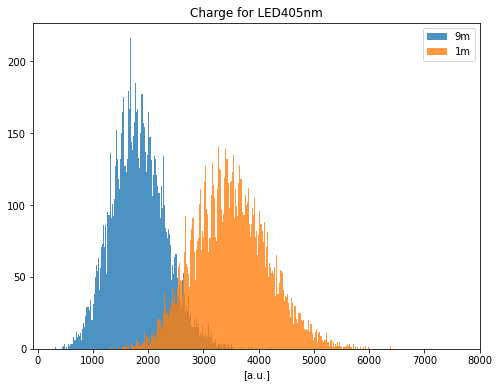

0.5209734224079426


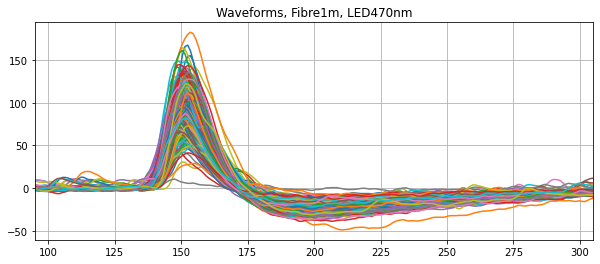

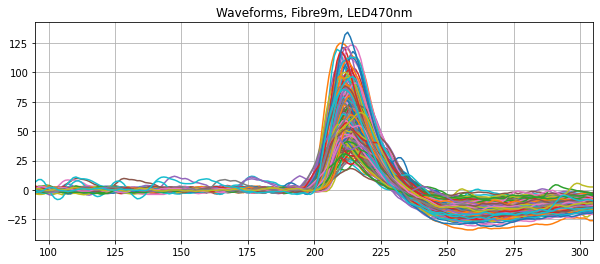

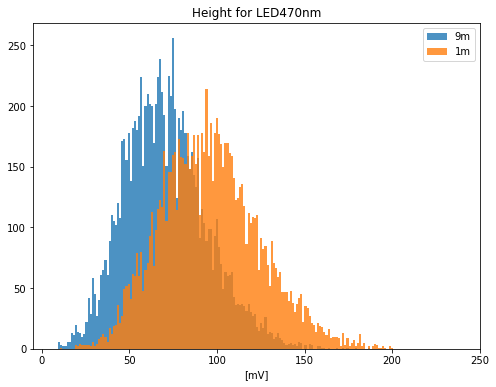

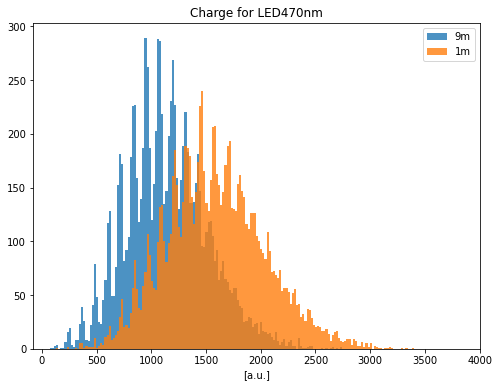

0.7207189951275319


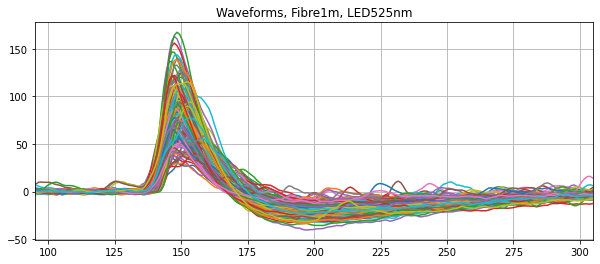

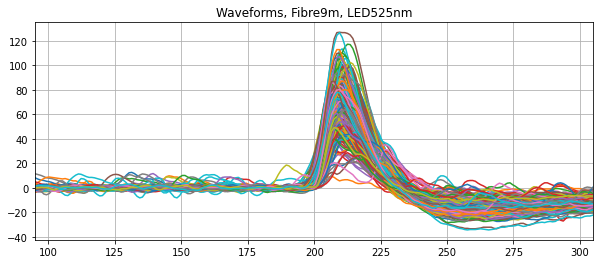

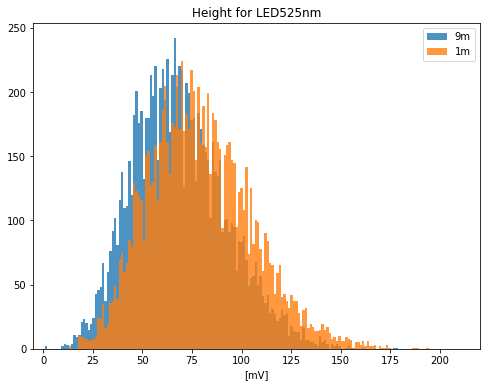

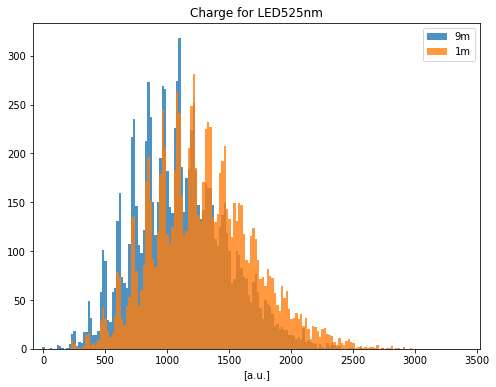

0.8626955319728977


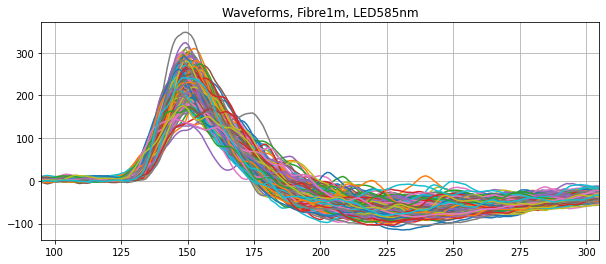

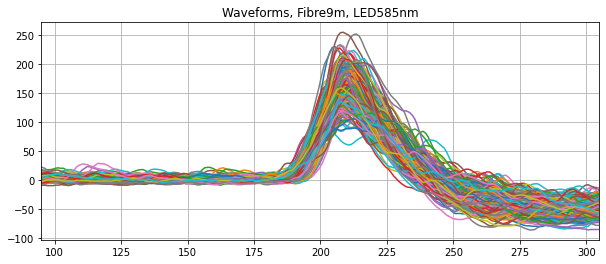

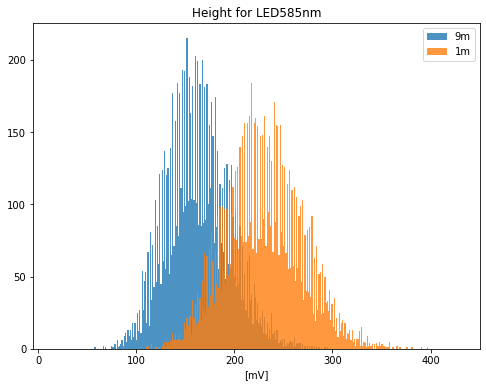

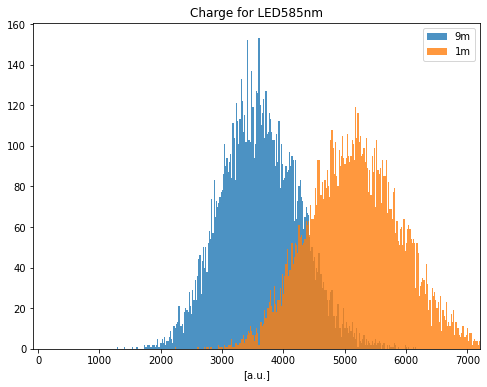

0.7000487299439762


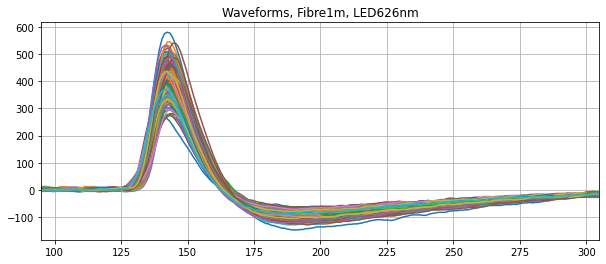

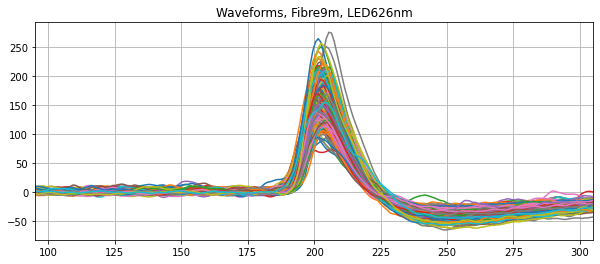

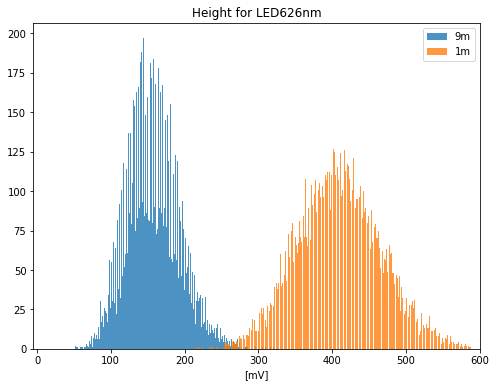

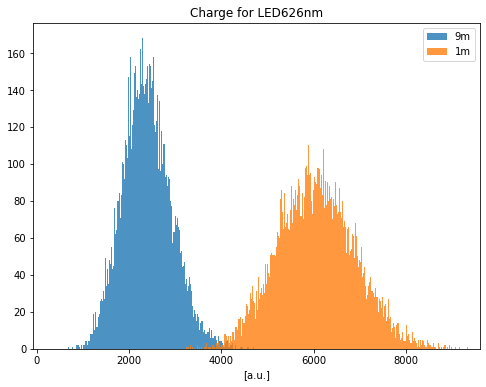

0.39381706519627413


In [37]:
import numpy as np
import scipy as scipy
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import math
import glob

def running_mean(x, N):                                                                                                                                                                  
  cumsum = np.cumsum(np.insert(x, 0, 0))
  return (cumsum[N:] - cumsum[:-N])/ float(N)#, np.sqrt(cumsum[N:] - cumsum[:-N])/ float(N)

dataDir="/Volumes/GoogleDrive/My Drive/MonashLabTest/PlasticFibreTests/"

#LED Wavelength Files
wlen = [385,405,470,525,585,626]
drawMax = [145,500,250,220,450,600]
Samples = 396
dt = 0.8e-9
freqThreshold = 0.25e8
nave = 5 # for moving average
#time = np.linspace(0.0,Samples*dt,Samples)
time = np.linspace(0.0,Samples,Samples)
fftT = np.linspace(0.0, 1.0/(2.0*dt), Samples//2)

subDirs=['Sep03_LEDTests/test_hv42_','Sep11Tests/Sep11_hv42_']
length=[1,10]
timeThre=[120,180]
width=32
sumRange=[[137,137+width],[196,196+width]]
factor=16 #
realLen=['1m','9m']

for iw in range(len(wlen)):
    height=[[],[]]
    charge=[[],[]]
    
    for il in range(2):
        plt.figure(figsize=(10,4))
        if iw<4:
            fileList=dataDir+'Sep03_LEDTests/test_hv42_'+str(length[il])+'m_plastic_LED'+str(wlen[iw])+'*.npy'
        else:
            fileList=dataDir+'Sep11Tests/Sep11_hv42_'+str(length[il])+'m_plastic_LED'+str(wlen[iw])+'nm_test1_*.npy'
        
        #print(fileList)
        files = glob.glob(fileList)
        #print(files)
        
        if len(files)==0:
            print('No such file!')
            print(files[0])
            continue
        
        for ifile in range(len(files)):
            fileData = np.array(np.load(files[ifile],allow_pickle=True))
            wfs=fileData[6]
            
            for j in range(int(len(wfs)/2)):
                wf     = wfs[2*j,:]
                wfFilt = running_mean(wf, nave)
                if j%50==0:
                    plt.plot(time,wfFilt)
                                
                height[il].append(wfFilt[timeThre[il]:timeThre[il]+50].max())
                charge[il].append(wfFilt[sumRange[il][0]:sumRange[il][1]].sum())
        plt.title('Waveforms, Fibre'+realLen[il]+', LED'+str(wlen[iw])+'nm')
        plt.xlim(95,305)
        plt.grid()
        plt.show()
    
    plt.figure(figsize=(8,6))
    plt.title('Height for LED'+str(wlen[iw])+'nm')
    plt.hist(height[1],bins=np.linspace(-10,590,500),alpha=0.8,label=realLen[1])
    plt.hist(height[0],bins=np.linspace(-10,590,500),alpha=0.8,label=realLen[0])
    plt.xlim(-5,drawMax[iw])
    plt.xlabel('[mV]')
    plt.legend(loc='upper right')
    plt.show()
    
    plt.figure(figsize=(8,6))
    plt.title('Charge for LED'+str(wlen[iw])+'nm')
    plt.hist(charge[1],bins=np.linspace(-10*factor,590*factor,500),alpha=0.8,label=realLen[1])
    plt.hist(charge[0],bins=np.linspace(-10*factor,590*factor,500),alpha=0.8,label=realLen[0])
    plt.xlim(-5*factor,drawMax[iw]*factor)
    plt.legend(loc='upper right')
    plt.xlabel('[a.u.]')
    plt.show()
    
    chargeLoss=np.array(charge[1]).mean()/np.array(charge[0]).mean()
    print(chargeLoss)